<a href="https://colab.research.google.com/github/Allessyer/Test_Problem/blob/main/task_2/Burnaev_lab_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### My Solution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

In [ ]:
class Vertex:
    
    def __init__(self, vertex_id):
        self.id = vertex_id
        self.neighbors = {}
    
    def add_neighbor(self, neighbor, weight=0):
        self.neighbors[neighbor] = weight
    
    def get_connections(self):
        return self.neighbors.keys()  

    def get_id(self):
        return self.id

    def get_weight(self, neighbor):
        return self.neighbors[neighbor]

In [ ]:
class Graph:
    
    def __init__(self):
        self.vert_dict = {}
        self.num_vertices = 0
        
    def add_vertex(self, vertex_id):
        self.num_vertices += 1
        new_vertex = Vertex(vertex_id)
        self.vert_dict[vertex_id] = new_vertex
    
    def get_vertex(self, vertex_id):
        return self.vert_dict.get(vertex_id)
    
    def get_n_vertices(self):
        return self.num_vertices

    def add_edge(self, from_vertex_id, to_vertex_id, weight = 0):
        '''
        
        a -------- b 
           weight
           
        '''
        a = from_vertex_id
        b = to_vertex_id
        
        if a in self.vert_dict and b in self.vert_dict:
            self.vert_dict[a].add_neighbor(b, weight)
            self.vert_dict[b].add_neighbor(a, weight)
        else:
            if a not in self.vert_dict:
                raise ValueError("Vertex from which you want to add edge doesn't exist. \
                                  Please, initialize it first.")
            elif b not in self.vert_dict:
                raise ValueError("Vertex to which you want to add edge doesn't exist. \
                                  Please, initialize it first.")
    
    def get_vertices(self):
        return self.vert_dict.keys()
    
    def create_coordinates(self):
        vertex_ids = self.get_vertices()
        n_vertices = len(vertex_ids)
        if n_vertices % 2 == 0:
            n = n_vertices // 2 

            x1 = np.linspace(-n,n,n)
            x2 = np.linspace(-(n-1),n-1,n)
            R = n
            y1 = [np.sqrt(R**2 - x_i**2) for x_i in x1]
            y2 = [-np.sqrt(R**2 - x_i**2) for x_i in x2]
        else:
            n = n_vertices // 2 

            x1 = np.linspace(-n,n,n)
            x2 = np.linspace(-(n-1),n-1,n+1)
            R = n
            y1 = [np.sqrt(R**2 - x_i**2) for x_i in x1]
            y2 = [-np.sqrt(R**2 - x_i**2) for x_i in x2]

        x = np.concatenate((x1, x2[::-1]), axis=None)
        y = np.concatenate((y1, y2[::-1]), axis=None)
        
        return x, y, R
        
    def plot_graph(self):
        
        x, y, R = self.create_coordinates()
        fig, ax = plt.subplots(figsize = (R,R))
        ax.scatter(x,y,s=22**2)
        for i in range(len(x)):
            ax.text(x[i], y[i], f"{i}", transform=ax.transData,ha='center', va='center',color='white')
            
        for vertex_id in self.vert_dict.keys():
            vertex = self.get_vertex(vertex_id)
            
            for neighbor_id in vertex.get_connections():
                weight = vertex.get_weight(neighbor_id)
                self.plot_edge(vertex_id, neighbor_id, weight)
    
    def plot_edge(self, frm, to, weight):
        x, y, _ = self.create_coordinates()
        plt.plot([x[frm], x[to]],[y[frm], y[to]],color='C0')
        mediana_x = (x[frm] + x[to])/2
        mediana_y = (y[frm] + y[to])/2
        if weight != 0:
            plt.text(mediana_x,mediana_y, f"{weight}",ha='left', va='bottom',color='black')
        
    def generate_random_graph(self, n_vertices=10, n_edges=10, weighted=False):
        vertex_ids = np.arange(n_vertices)
        for i in vertex_ids:
            self.add_vertex(i)
        
        for _ in range(n_edges):
            if weighted:
                weight = random.randint(0, n_edges)
            else:
                weight = 0
            from_vertex_id, to_vertex_id = np.random.choice(n_vertices,(2,1),replace=False) 
            self.add_edge(from_vertex_id[0], to_vertex_id[0], weight) 
            
    def create_adjacency_matrix(self):
        adjacency_matrix = np.zeros((self.num_vertices,self.num_vertices))
        for vertex_id in range(self.num_vertices):
            vertex = self.get_vertex(vertex_id)
            neighbors = list(vertex.get_connections())
            adjacency_matrix[vertex_id,neighbors] += 1
        return adjacency_matrix

In [ ]:
def create_invitation_list_(guests):
    adjacency_matrix = guests.create_adjacency_matrix()
    n_guests = guests.get_n_vertices()
    invitation_list = []
    
    max_friendly = 0
    min_n_enemies = n_guests
    all_ids = np.arange(n_guests)
    while np.any(all_ids):
        for guest_id in all_ids:
            check_row = adjacency_matrix[guest_id, all_ids]
            n_enemies = np.sum(check_row)

            if n_enemies <  min_n_enemies:
                min_n_enemies = n_enemies
                max_friendly = guest_id
                friends = np.where(check_row == 0)[0]
                real_friends = all_ids[[friends]]
                real_friends = real_friends[real_friends != max_friendly] # delete himself

        all_ids = real_friends
        invitation_list.append(max_friendly)
        max_friendly = 0
        min_n_enemies = n_guests
    
    return invitation_list

---------- Experiment 0 ----------


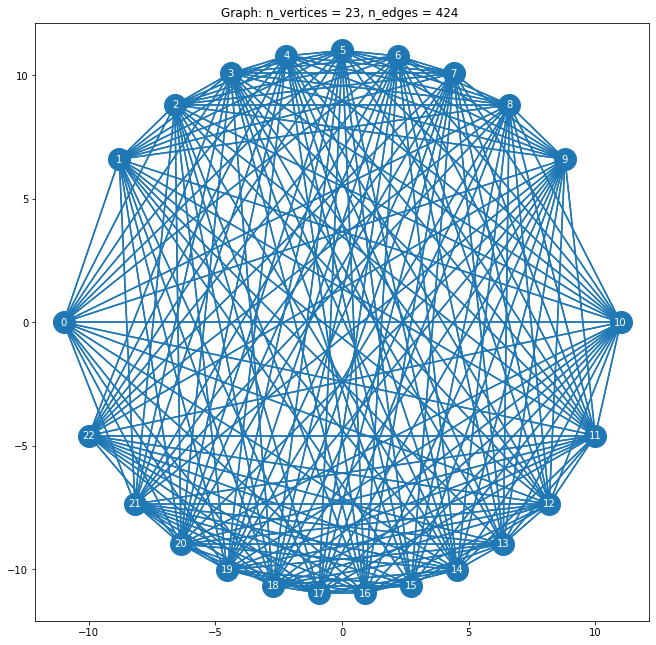

INVITATION LIST:  [15, 13, 0]
----------------------------------
---------- Experiment 1 ----------


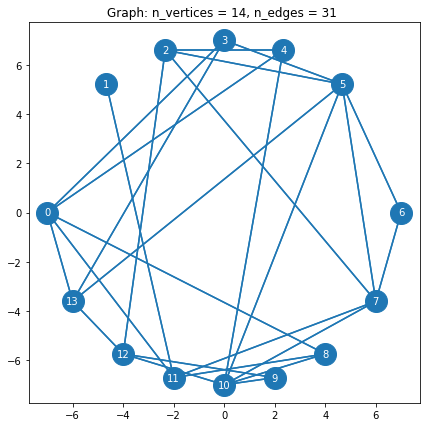

INVITATION LIST:  [1, 6, 2, 9, 8, 3]
----------------------------------
---------- Experiment 2 ----------


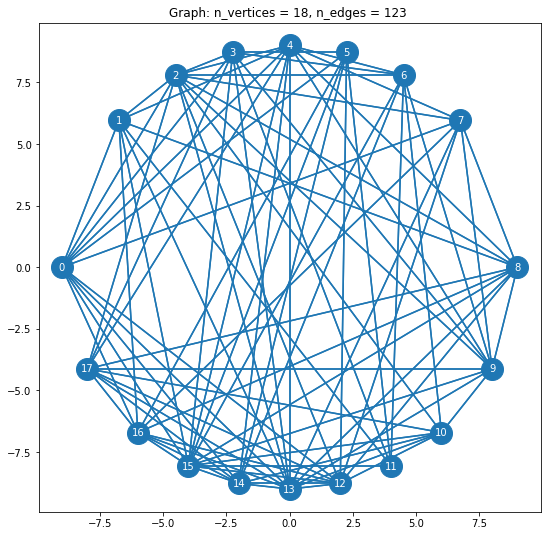

INVITATION LIST:  [11, 10, 0, 8]
----------------------------------
---------- Experiment 3 ----------


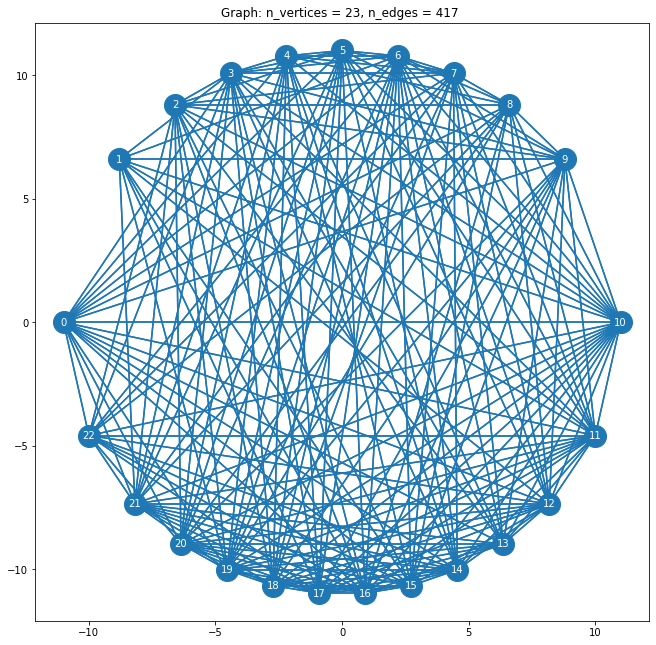

INVITATION LIST:  [1, 8, 13, 5]
----------------------------------
---------- Experiment 4 ----------


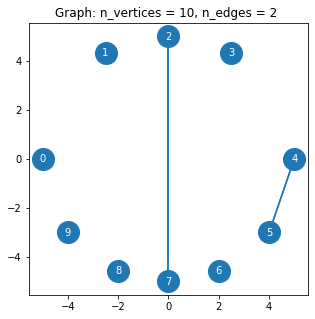

INVITATION LIST:  [0, 1, 3, 6, 8, 9, 2, 4]
----------------------------------
---------- Experiment 5 ----------


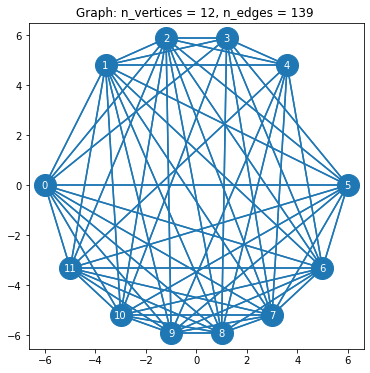

INVITATION LIST:  [4, 0]
----------------------------------
---------- Experiment 6 ----------


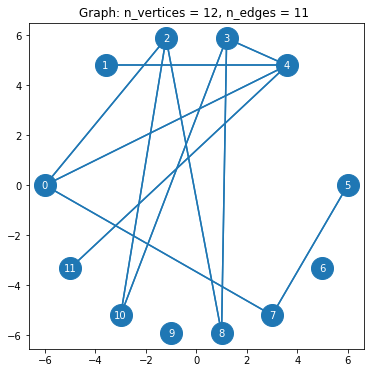

INVITATION LIST:  [6, 9, 1, 11, 5, 0, 8, 10]
----------------------------------
---------- Experiment 7 ----------


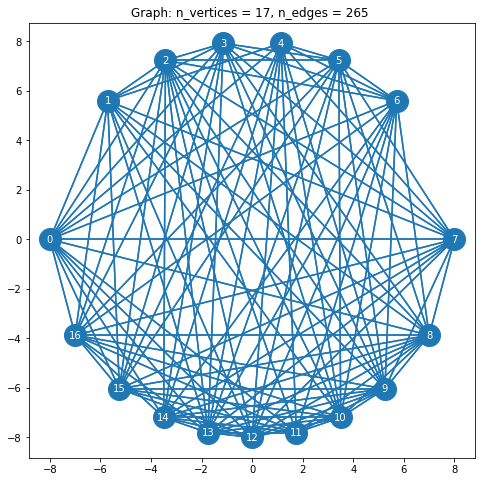

INVITATION LIST:  [11, 1, 5]
----------------------------------
---------- Experiment 8 ----------


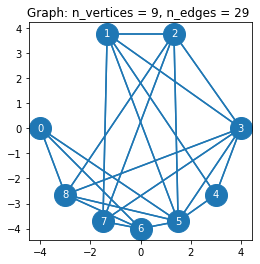

INVITATION LIST:  [0, 4, 2]
----------------------------------
---------- Experiment 9 ----------


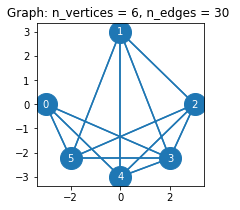

INVITATION LIST:  [0, 1]
----------------------------------


In [ ]:
if __name__ == '__main__':
    for i in range(10):
        print('-'*10, f'Experiment {i}', '-'*10)
        n_vertices = random.randint(2, 30)
        n_edges = random.randint(0, n_vertices**2)

        guests = Graph()
        guests.generate_random_graph(n_vertices, n_edges,weighted=False)
        guests.plot_graph()
        plt.title(f"Graph: n_vertices = {n_vertices}, n_edges = {n_edges} ")
        plt.show()

        invitation_list = create_invitation_list_(guests)
        print("INVITATION LIST: ", invitation_list)
        print('-'*34)
